In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('C:\\Data\\Custom\\bhp.csv')
df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11864,Tumkur Road,2 BHK,992.0,2.0,70.00,2,7056
7602,Electronic City Phase II,3 BHK,1220.0,2.0,36.21,3,2968
10258,Vishveshwarya Layout,6 Bedroom,4000.0,6.0,230.00,6,5750
5518,Akshaya Nagar,3 BHK,1690.0,3.0,85.00,3,5029
4798,Uttarahalli,1 BHK,661.0,1.0,36.00,1,5446
7643,other,4 BHK,5422.0,6.0,1900.00,4,35042
9158,Harlur,2 BHK,1386.0,2.0,85.00,2,6132
1482,Kengeri,2 BHK,1197.0,2.0,50.00,2,4177
8598,Balagere,2 BHK,1007.0,2.0,53.00,2,5263
9257,Nagavarapalya,2 BHK,1335.0,2.0,110.00,2,8239


In [ ]:
zz

In [98]:
print(df.shape)
df.price_per_sqft.describe()

(13200, 7)


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [94]:
min_value,max_value=df.price_per_sqft.quantile([0.001,0.999])
print(round(min_value),round(max_value))

1366 50959


In [97]:
new_df=df[(df['price_per_sqft']>min_value) & (df['price_per_sqft']<max_value)]
new_df.shape

(13172, 7)

In [102]:
mean=new_df['price_per_sqft'].mean()
std=new_df['price_per_sqft'].std()

In [104]:
range1,range2=mean-4*std,mean+4*std
new_df=new_df[(new_df['price_per_sqft']>range1) & (new_df['price_per_sqft']<range2)]
new_df.shape

(13151, 7)

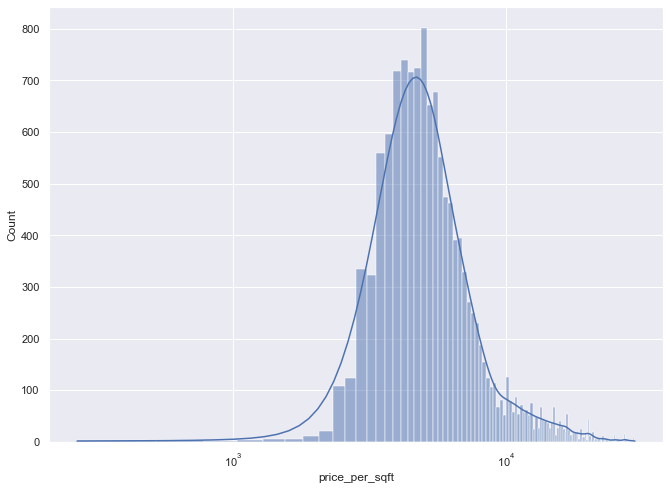

In [108]:
sns.set(rc={'figure.figsize':(11,8)})
a=sns.histplot(new_df['price_per_sqft'],kde=True)
a.set(xscale='log');

In [112]:
new_df['z_scores']=(new_df['price_per_sqft']-new_df['price_per_sqft'].mean())/new_df['price_per_sqft'].std()
new_df.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_scores
5920,Bisuvanahalli,3 BHK,1075.0,2.0,52.00,3,4837,-0.452778
10583,Yelahanka New Town,1 BHK,488.0,1.0,20.00,1,4098,-0.644824
2582,Arekere,3 BHK,2072.0,3.0,108.00,3,5212,-0.355325
2134,Attibele,4 Bedroom,2168.0,4.0,95.00,4,4381,-0.571280
6113,Bommanahalli,2 BHK,1100.0,1.0,55.00,2,5000,-0.410418
9395,Hormavu,2 BHK,1065.0,2.0,50.92,2,4781,-0.467331
6495,Sarjapur Road,3 BHK,1700.0,3.0,108.00,3,6352,-0.059069
8727,other,3 Bedroom,2400.0,4.0,130.00,3,5416,-0.302311
4602,Jalahalli,3 BHK,1932.0,4.0,135.00,3,6987,0.105950
7560,Whitefield,2 BHK,1186.0,2.0,55.00,2,4637,-0.504752


<AxesSubplot:xlabel='z_scores', ylabel='Count'>

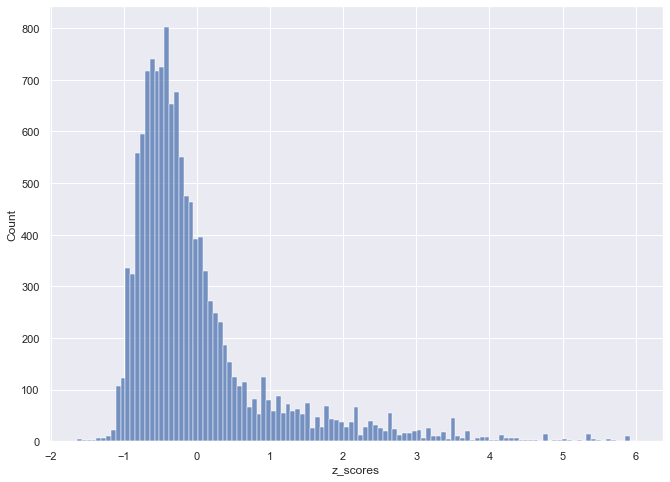

In [117]:
sns.histplot(new_df['z_scores'])

In [124]:
new_df=new_df[new_df['z_scores']<1.5]

<AxesSubplot:xlabel='z_scores', ylabel='Count'>

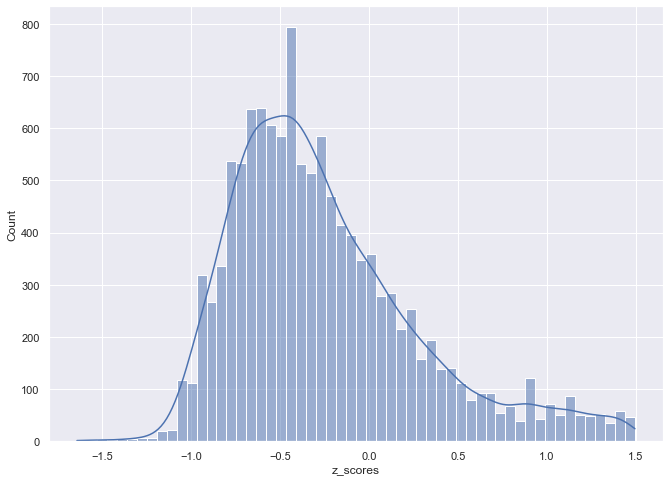

In [125]:
sns.histplot(new_df['z_scores'],kde=True)